In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/google-cluster-data/instances_data.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
df=pd.read_csv("/kaggle/input/google-cluster-data/instances_data.csv")
df.head()

,Unnamed: 0,instance_index,cpu_usage_distribution,alloc_collection_id,alloc_instance_index,sample_rate,collection_id,cycles_per_instruction,machine_id,collection_type,...,cpu_usage_distribution_1,hour_index,avg_cpu_usage,avg_memory_usage,start_time_hour,end_time_hour,hour,day,hour_30min,cpu_usage_percentile_group
0,0,588,"[0.00011157989501953125, 0.0001392364501953125...",0,-1,1.0,398615582868,NaN,24273990861,0,...,"[0.00011157989501953125, 0.0001392364501953125...",27.011366,1.454353e-07,1.893441e-08,0.295556,0.250000,0.0,28.0,0.0,Medium
1,1,588,"[7.152557373046875e-05, 0.0001506805419921875,...",0,-1,1.0,398615582868,NaN,24273990861,0,...,"[7.152557373046875e-05, 0.0001506805419921875,...",27.012627,1.633962e-07,2.209345e-08,0.333333,0.272778,0.0,28.0,0.0,Medium
2,2,588,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0,-1,1.0,398615582868,NaN,24273990861,0,...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",27.013125,7.232030e-09,1.569589e-09,0.356111,0.273889,0.0,28.0,0.0,Medium
3,3,588,[],0,-1,1.0,398615582868,NaN,24273990861,0,...,[],27.013154,0.000000e+00,1.519918e-09,0.357222,0.274167,0.0,28.0,0.0,Low
4,4,722,"[4.482269287109375e-05, 0.0001220703125, 0.000...",0,-1,1.0,398615582868,NaN,23744543975,0,...,"[4.482269287109375e-05, 0.0001220703125, 0.000...",27.013009,8.424123e-08,2.205372e-08,0.333333,0.291111,0.0,28.0,0.0,Medium


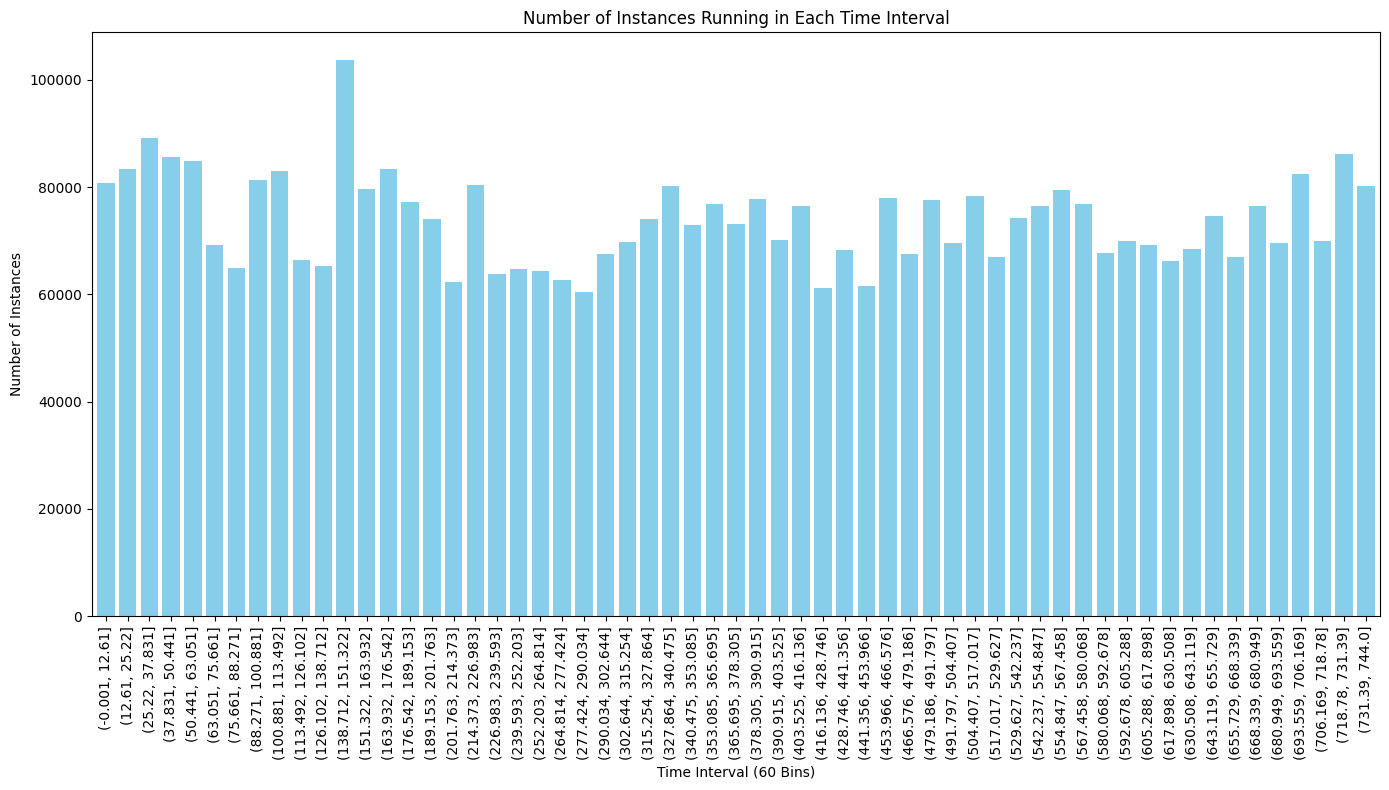

In [4]:

min_time = df['start_time'].min()
max_time = df['end_time'].max()


bins = np.linspace(min_time, max_time, 60) 
df['time_bin'] = pd.cut(df['start_time'], bins=bins, include_lowest=True)

instance_counts = df['time_bin'].value_counts().sort_index()


plt.figure(figsize=(14, 8))
instance_counts.plot(kind='bar', color='skyblue', width=0.8)


plt.xlabel('Time Interval (60 Bins)')
plt.ylabel('Number of Instances')
plt.title('Number of Instances Running in Each Time Interval')


plt.tight_layout()
plt.show()

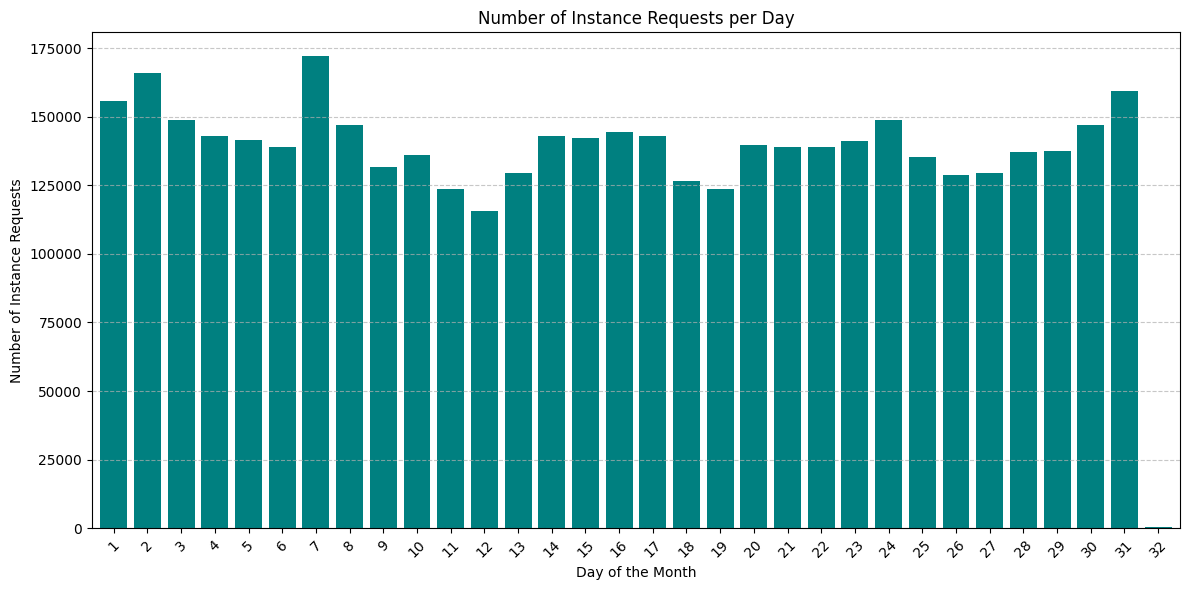

In [5]:
import matplotlib.pyplot as plt


daily_request_counts = df['start_day'].value_counts().sort_index()


plt.figure(figsize=(12, 6))
daily_request_counts.plot(kind='bar', color='teal', width=0.8)

plt.xlabel('Day of the Month')
plt.ylabel('Number of Instance Requests')
plt.title('Number of Instance Requests per Day')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In [6]:

days_in_month = 32  
cpu_usage_per_day = pd.Series(0.0, index=range(1, days_in_month + 1))
instance_counts = pd.Series(0, index=range(1, days_in_month + 1))
max_cpu_usage_per_day = pd.Series(float('-inf'), index=range(1, days_in_month + 1))
min_cpu_usage_per_day = pd.Series(float('inf'), index=range(1, days_in_month + 1))

for i, row in df.iterrows():
    for day in range(row['start_day'], row['end_day'] + 1):
        cpu_usage_per_day[day] += row['average_cpu_usage']
        instance_counts[day] += 1
        max_cpu_usage_per_day[day] = max(max_cpu_usage_per_day[day], row['average_cpu_usage'])
        min_cpu_usage_per_day[day] = min(min_cpu_usage_per_day[day], row['average_cpu_usage'])


average_cpu_usage_per_day = cpu_usage_per_day / instance_counts
average_cpu_usage_per_day.fillna(0, inplace=True)  
max_cpu_usage_per_day.replace(float('-inf'), 0, inplace=True)  
min_cpu_usage_per_day.replace(float('inf'), 0, inplace=True)   



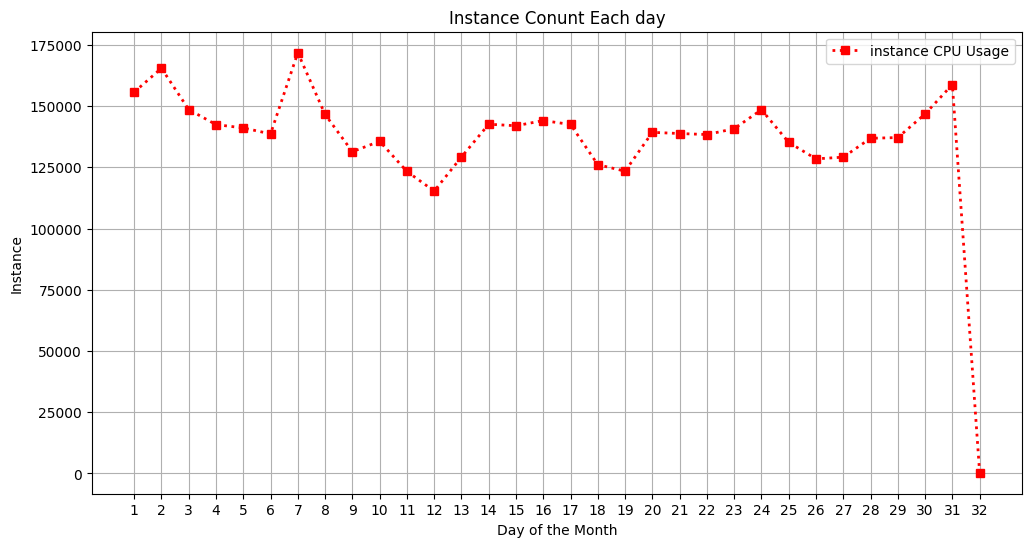

In [7]:

plt.figure(figsize=(12, 6))
plt.plot(instance_counts, label='instance CPU Usage', color='red', marker='s', linestyle=':', linewidth=2)


plt.xlabel('Day of the Month')
plt.ylabel('Instance')
plt.title('Instance Conunt Each day')
plt.xticks(range(1, days_in_month + 1))
plt.legend()

plt.grid(True)
plt.show()

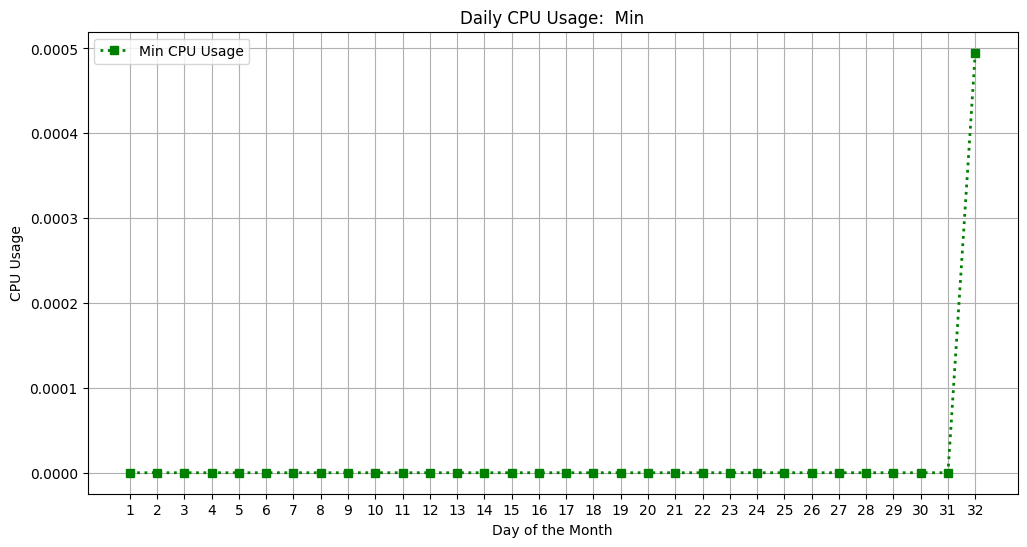

In [8]:

plt.figure(figsize=(12, 6))
plt.plot(min_cpu_usage_per_day, label='Min CPU Usage', color='green', marker='s', linestyle=':', linewidth=2)


plt.xlabel('Day of the Month')
plt.ylabel('CPU Usage')
plt.title('Daily CPU Usage:  Min')
plt.xticks(range(1, days_in_month + 1))
plt.legend()
plt.grid(True)
plt.show()

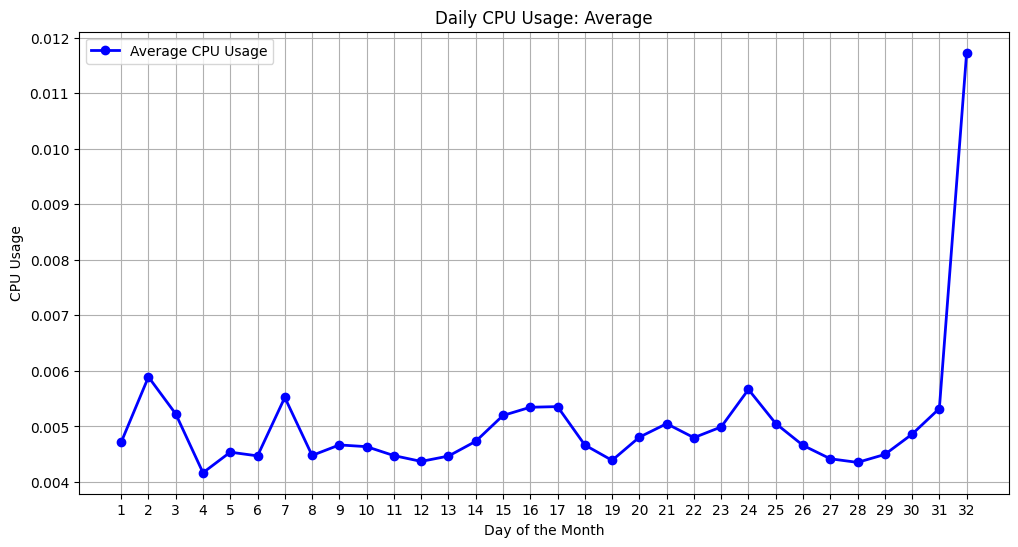

In [9]:

plt.figure(figsize=(12, 6))
plt.plot(average_cpu_usage_per_day, label='Average CPU Usage', color='blue', marker='o', linestyle='-', linewidth=2)

plt.xlabel('Day of the Month')
plt.ylabel('CPU Usage')
plt.title('Daily CPU Usage: Average')
plt.xticks(range(1, days_in_month + 1))
plt.legend()
plt.grid(True)
plt.show()

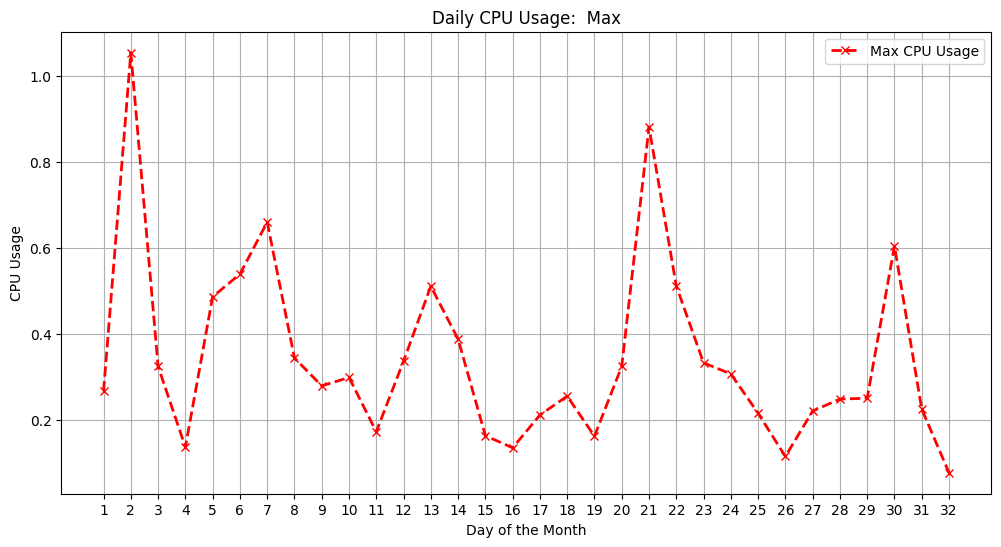

In [10]:

plt.figure(figsize=(12, 6))
plt.plot(max_cpu_usage_per_day, label='Max CPU Usage', color='red', marker='x', linestyle='--', linewidth=2)

plt.xlabel('Day of the Month')
plt.ylabel('CPU Usage')
plt.title('Daily CPU Usage:  Max')
plt.xticks(range(1, days_in_month + 1))
plt.legend()
plt.grid(True)
plt.show()

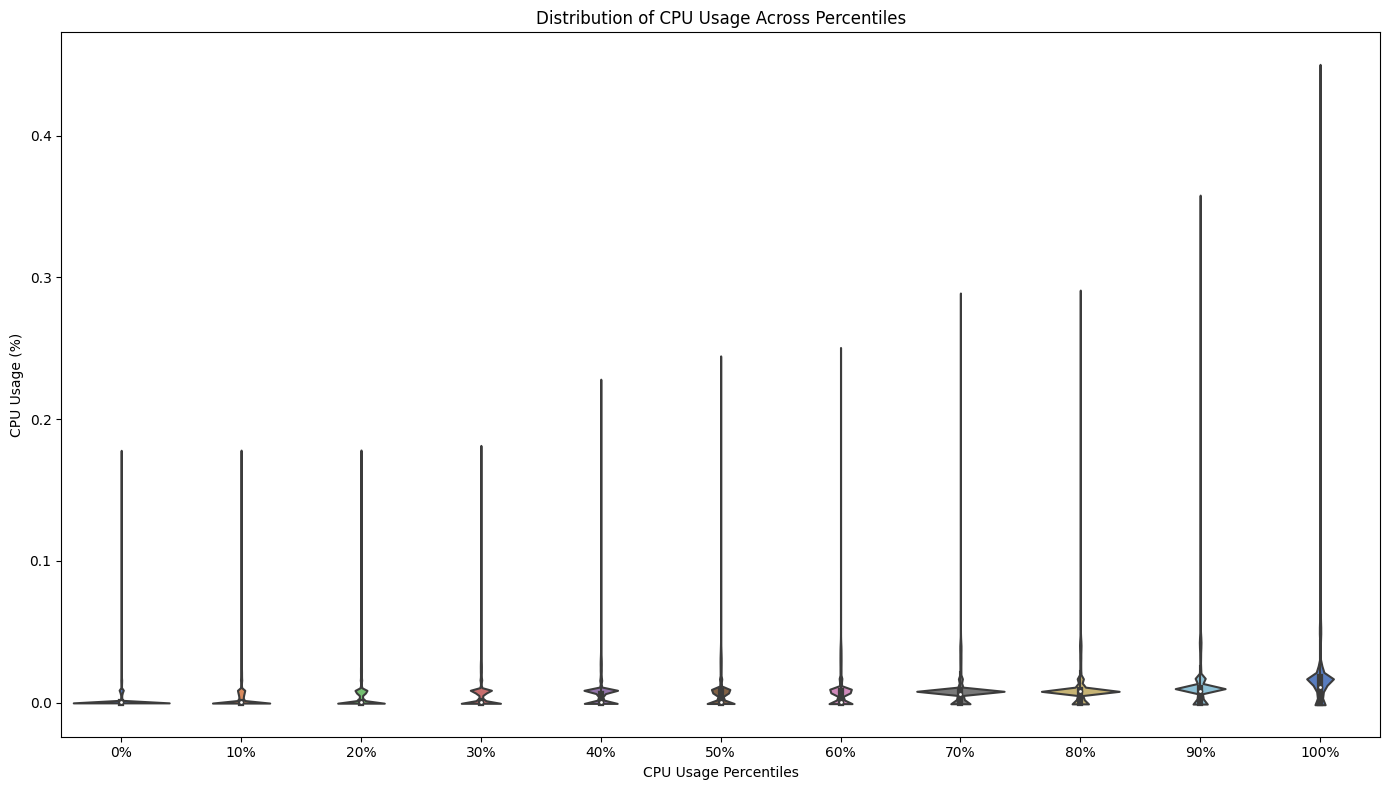

In [11]:


df['cpu_usage_distribution_1'] = df['cpu_usage_distribution'].apply(lambda x: eval(x) if isinstance(x, str) else x)

cpu_percentiles = pd.DataFrame(df['cpu_usage_distribution_1'].tolist(), columns=[
    '0%', '10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%', '100%'])


cpu_percentiles_melted = cpu_percentiles.melt(var_name="Percentile", value_name="CPU Usage")


plt.figure(figsize=(14, 8))


sns.violinplot(x="Percentile", y="CPU Usage", data=cpu_percentiles_melted, palette="muted")


plt.xlabel("CPU Usage Percentiles")
plt.ylabel("CPU Usage (%)")
plt.title("Distribution of CPU Usage Across Percentiles")

plt.tight_layout()
plt.show()

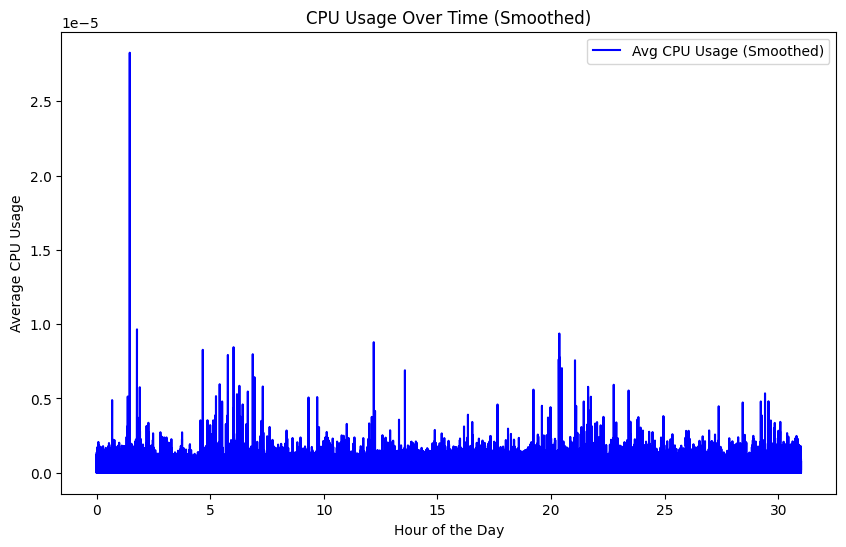

In [12]:

df_downsampled = df.groupby('hour_index')['avg_cpu_usage'].mean().reset_index()

df_downsampled['avg_cpu_usage_smooth'] = df_downsampled['avg_cpu_usage'].rolling(window=5, center=True).mean()

plt.figure(figsize=(10, 6))
plt.plot(df_downsampled['hour_index'], df_downsampled['avg_cpu_usage_smooth'], label='Avg CPU Usage (Smoothed)', color='blue')
plt.xlabel('Hour of the Day')
plt.ylabel('Average CPU Usage')
plt.title('CPU Usage Over Time (Smoothed)')
plt.legend()
plt.show()

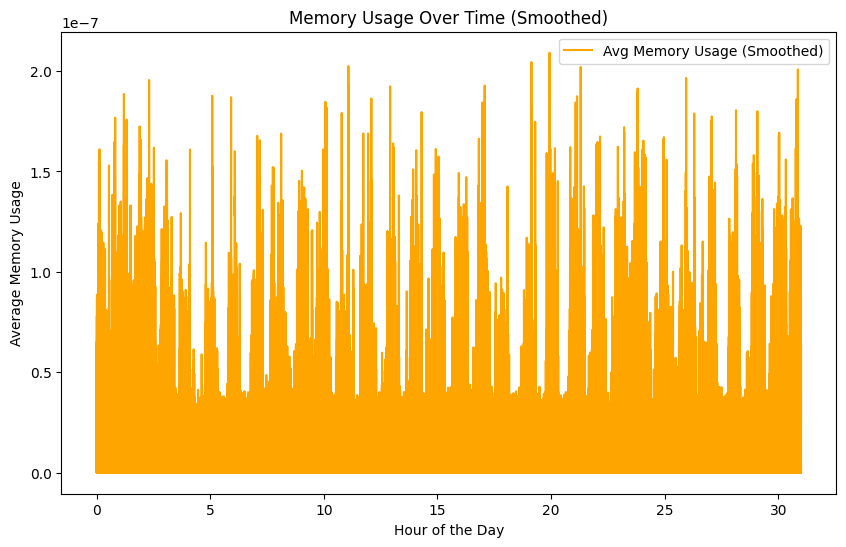

In [13]:
df_downsampled = df.groupby('hour_index')['avg_memory_usage'].mean().reset_index()


df_downsampled['avg_memory_usage_smooth'] = df_downsampled['avg_memory_usage'].rolling(window=5, center=True).mean()

plt.figure(figsize=(10, 6))
plt.plot(df_downsampled['hour_index'], df_downsampled['avg_memory_usage_smooth'], label='Avg Memory Usage (Smoothed)', color='orange')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Memory Usage')
plt.title('Memory Usage Over Time (Smoothed)')
plt.legend()
plt.show()

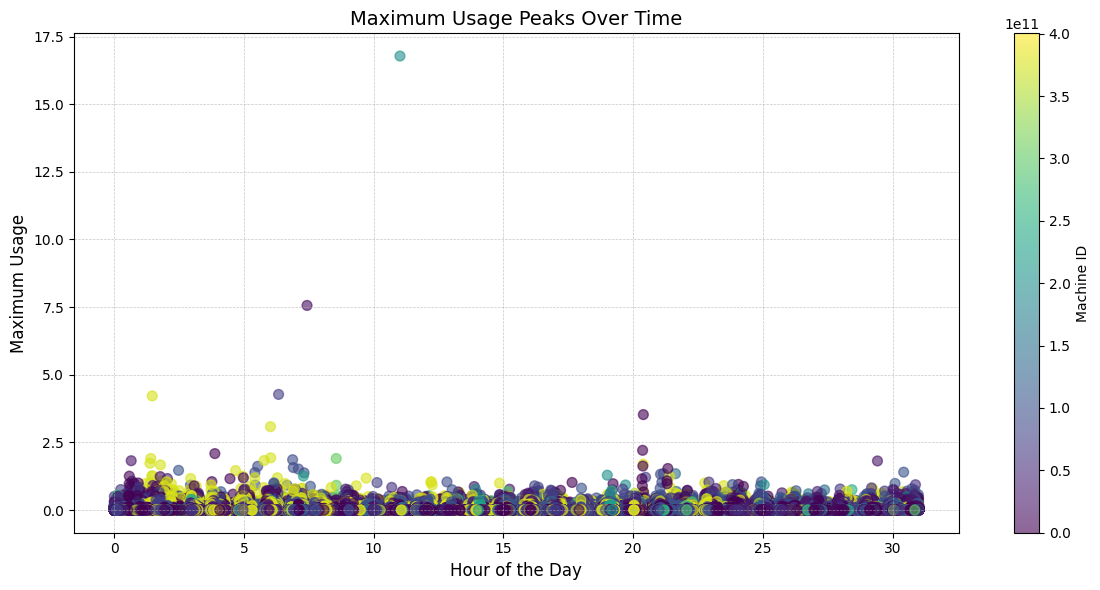

In [14]:

plt.figure(figsize=(12, 6))

scatter = plt.scatter(df['hour_index'], df['maximum_cpu_usage'], c=df['machine_id'], cmap='viridis', s=50, alpha=0.6)


plt.colorbar(scatter, label='Machine ID')  


plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Maximum Usage', fontsize=12)
plt.title('Maximum Usage Peaks Over Time', fontsize=14)

plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()


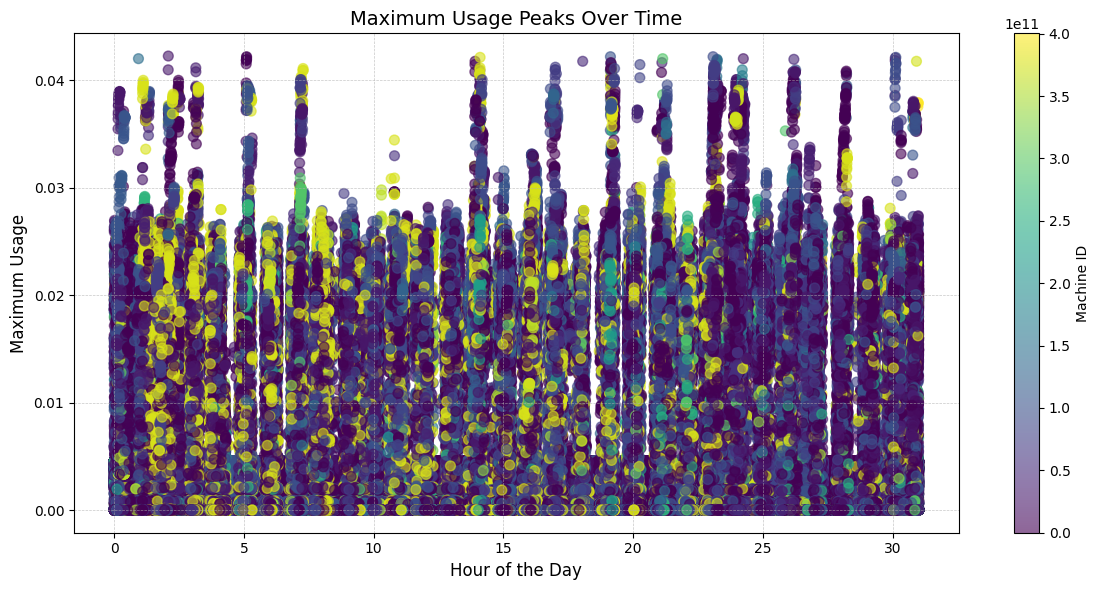

In [15]:
plt.figure(figsize=(12, 6))


scatter = plt.scatter(df['hour_index'], df['maximum_memory_usage'], c=df['machine_id'], cmap='viridis', s=50, alpha=0.6)

plt.colorbar(scatter, label='Machine ID') 

plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Maximum Usage', fontsize=12)
plt.title('Maximum Usage Peaks Over Time', fontsize=14)

plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()


In [16]:
unique_machine_ids = df['machine_id'].nunique()


print(f"Number of unique machine IDs: {unique_machine_ids}")

max_machine_id = df['machine_id'].max()
min_machine_id = df['machine_id'].min()

print(f"Maximum Machine ID: {max_machine_id}")
print(f"Minimum Machine ID: {min_machine_id}")


Number of unique machine IDs: 9929
Maximum Machine ID: 400224536580
Minimum Machine ID: -1


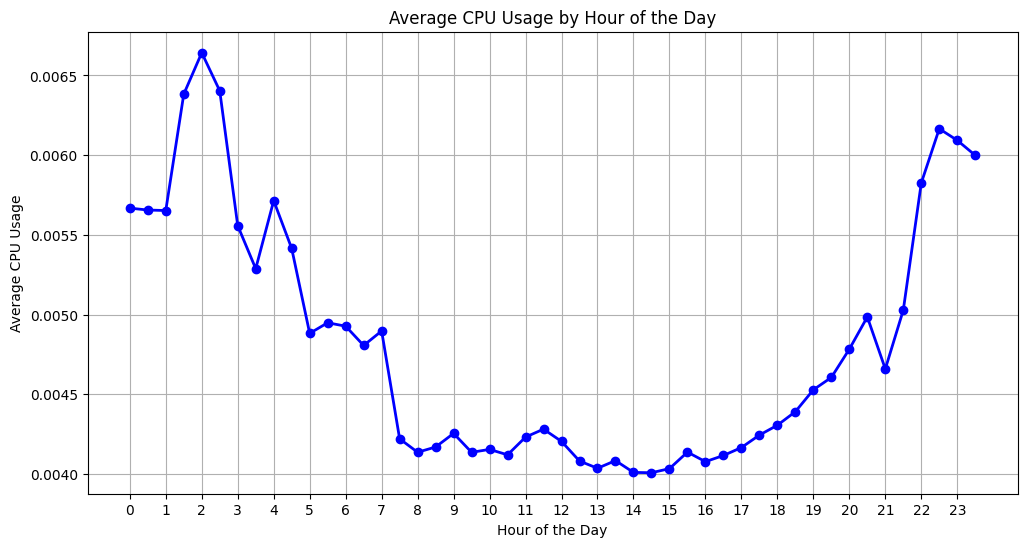

In [31]:
hourly_cpu_usage = df.groupby(['hour'])['average_cpu_usage'].mean()

plt.figure(figsize=(12, 6))
plt.plot(hourly_cpu_usage.index, hourly_cpu_usage.values, color='blue', marker='o', linestyle='-', linewidth=2)

# Customize plot
plt.xlabel('Hour of the Day')
plt.ylabel('Average CPU Usage')
plt.title('Average CPU Usage by Hour of the Day')
plt.xticks(range(0, 24))  # Setting ticks for each hour
plt.grid(True)
plt.show()


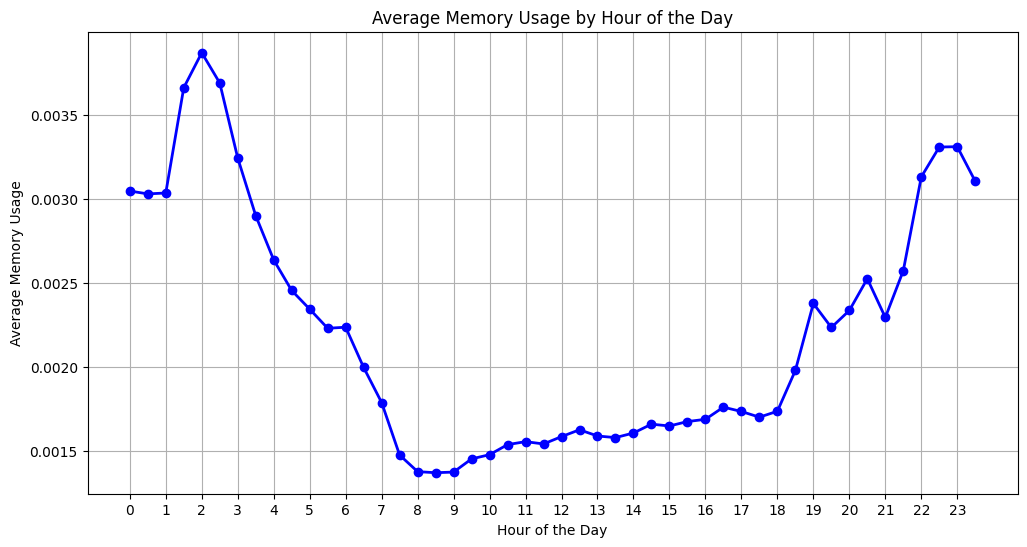

In [32]:
hourly_cpu_usage = df.groupby(['hour'])['average_memory_usage'].mean()

plt.figure(figsize=(12, 6))
plt.plot(hourly_cpu_usage.index, hourly_cpu_usage.values, color='blue', marker='o', linestyle='-', linewidth=2)

# Customize plot
plt.xlabel('Hour of the Day')
plt.ylabel('Average Memory Usage')
plt.title('Average Memory Usage by Hour of the Day')
plt.xticks(range(0, 24))  # Setting ticks for each hour
plt.grid(True)
plt.show()


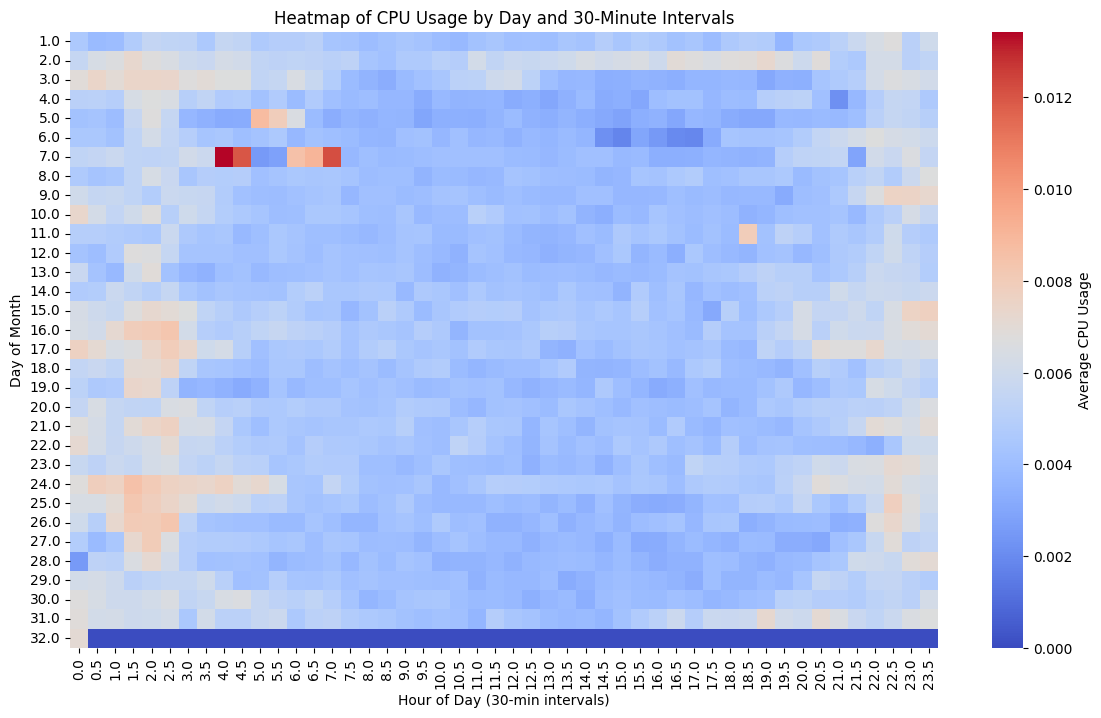

In [33]:

usage_by_day_hour = df.groupby(['day', 'hour_30min'])['average_cpu_usage'].mean().unstack(fill_value=0)


plt.figure(figsize=(14, 8))
sns.heatmap(usage_by_day_hour, cmap='coolwarm', cbar_kws={'label': 'Average CPU Usage'})
plt.xlabel('Hour of Day (30-min intervals)')
plt.ylabel('Day of Month')
plt.title('Heatmap of CPU Usage by Day and 30-Minute Intervals')
plt.show()

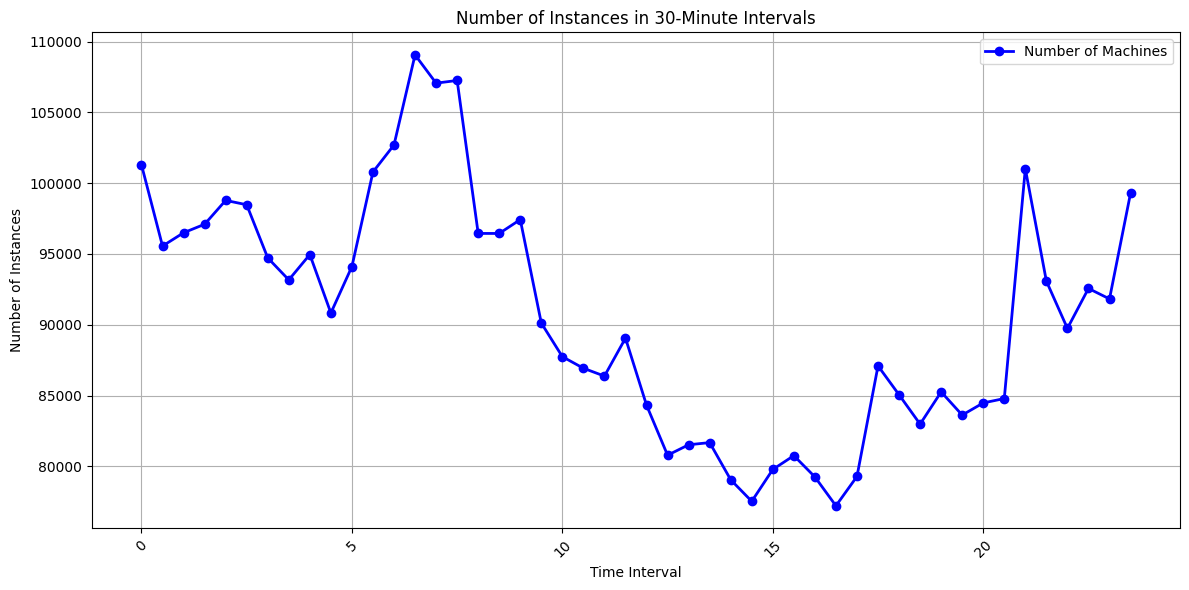

In [34]:
instances_per_30min = df.groupby('hour_30min')['machine_id'].count().reset_index()
instances_per_30min.columns = ['Time Interval', 'Number of Machines']


plt.figure(figsize=(12, 6))
plt.plot(instances_per_30min['Time Interval'], instances_per_30min['Number of Machines'], label='Number of Machines', marker='o', linestyle='-', color='b', linewidth=2)

plt.xlabel('Time Interval')
plt.ylabel('Number of Instances')
plt.title('Number of Instances in 30-Minute Intervals')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.legend()

# Show the plot
plt.show()


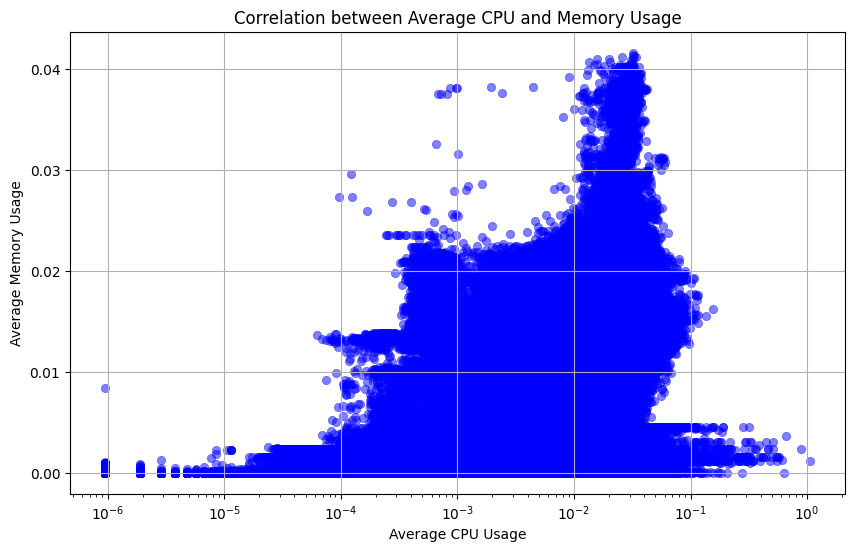

In [35]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='average_cpu_usage', y='average_memory_usage', alpha=0.5, color='blue', edgecolor=None)
plt.xscale('log')
# plt.yscale('log')
plt.xlabel('Average CPU Usage')
plt.ylabel('Average Memory Usage')
plt.title('Correlation between Average CPU and Memory Usage')
plt.grid(True)
plt.show()

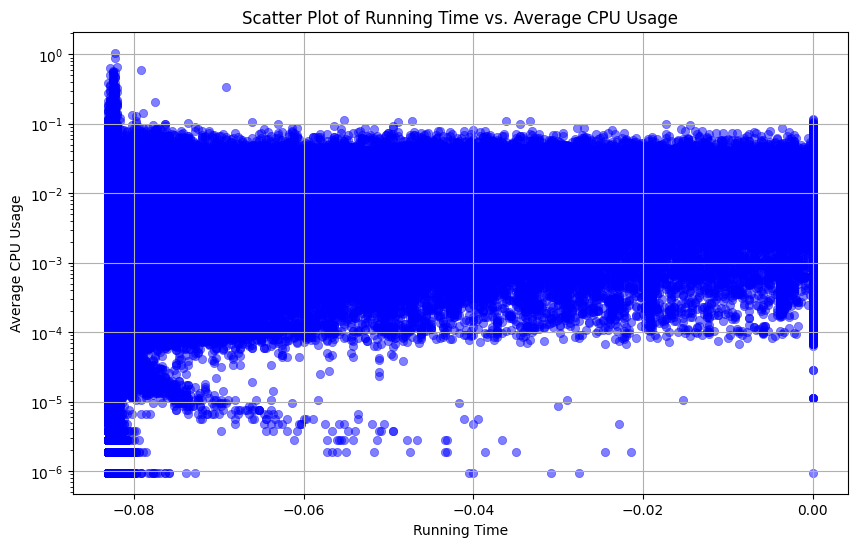

In [37]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='running_time', y='average_cpu_usage', alpha=0.5, color='blue', edgecolor=None)

plt.yscale('log')

plt.xlabel('Running Time')
plt.ylabel('Average CPU Usage')
plt.title('Scatter Plot of Running Time vs. Average CPU Usage')
plt.grid(True)
plt.show()

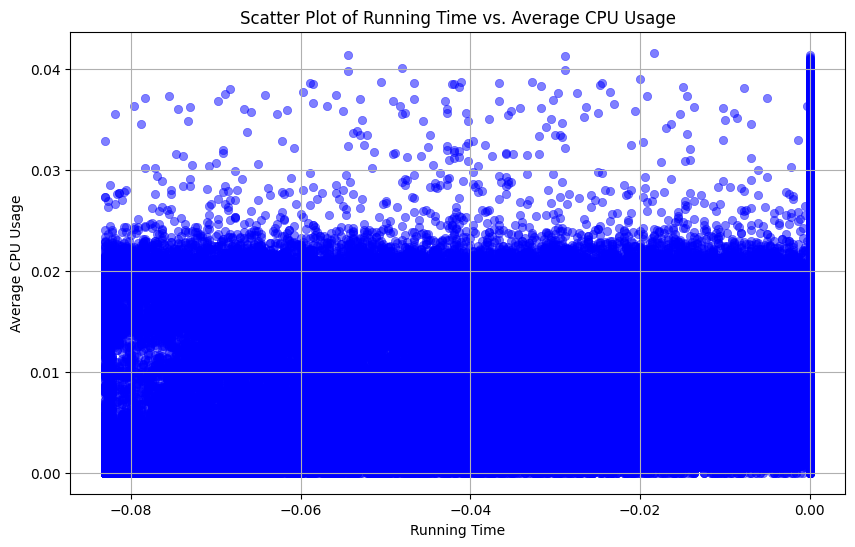

In [38]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='running_time', y='average_memory_usage', alpha=0.5, color='blue', edgecolor=None)

plt.xlabel('Running Time')
plt.ylabel('Average CPU Usage')
plt.title('Scatter Plot of Running Time vs. Average CPU Usage')
plt.grid(True)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


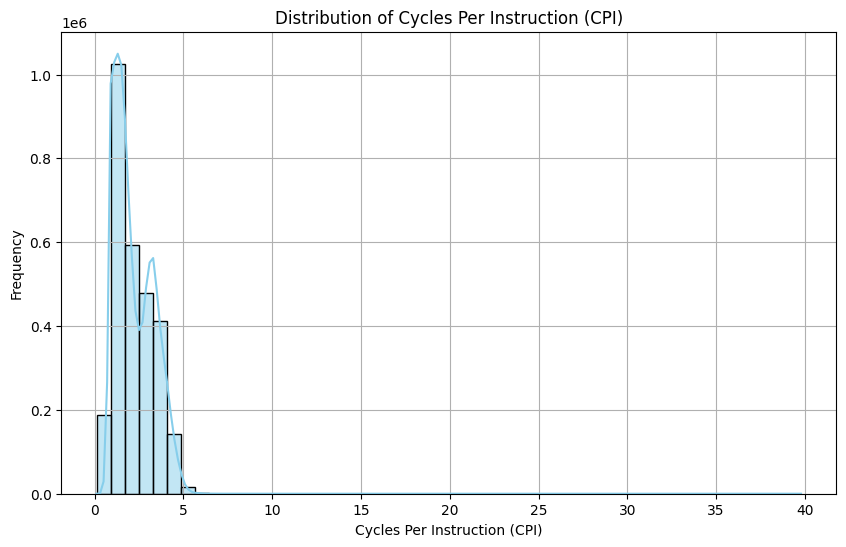

In [39]:
plt.figure(figsize=(10, 6))


sns.histplot(df['cycles_per_instruction'], bins=50, kde=True, color='skyblue', edgecolor='black')

plt.xlabel('Cycles Per Instruction (CPI)')
plt.ylabel('Frequency')
plt.title('Distribution of Cycles Per Instruction (CPI)')
plt.grid(True)
plt.show()

In [24]:
cpu_percentiles = df['average_cpu_usage'].quantile([0.25, 0.5, 0.75, 0.9, 0.95, 0.99])
memory_percentiles = df['average_memory_usage'].quantile([0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

In [25]:
lower_threshold = df['average_cpu_usage'].quantile(0.01)
upper_threshold = df['average_cpu_usage'].quantile(0.99)

outliers = df[(df['average_cpu_usage'] < lower_threshold) | (df['average_cpu_usage'] > upper_threshold)]


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


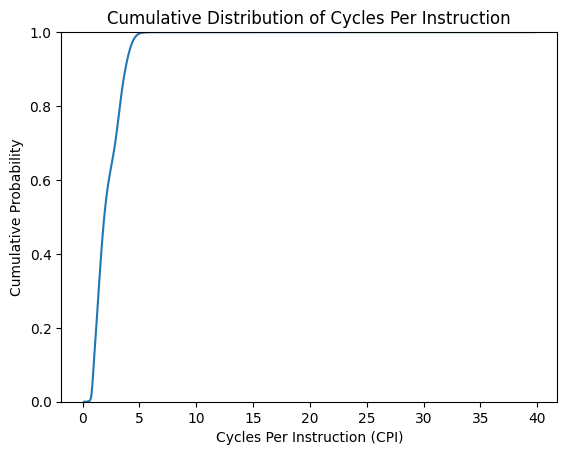

In [26]:
sns.ecdfplot(data=df, x='cycles_per_instruction')
plt.xlabel('Cycles Per Instruction (CPI)')
plt.ylabel('Cumulative Probability')
plt.title('Cumulative Distribution of Cycles Per Instruction')
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


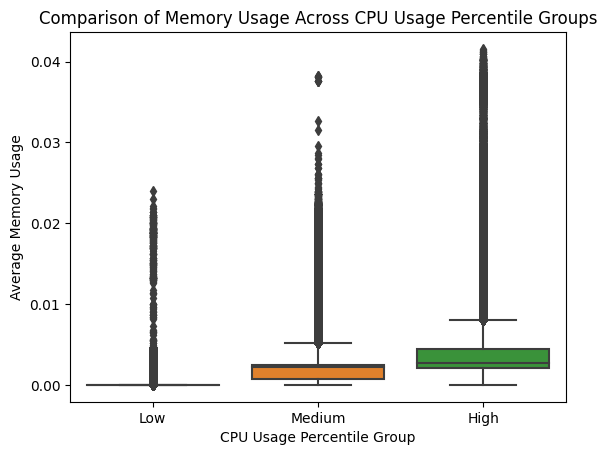

In [27]:
df['cpu_usage_percentile_group'] = pd.qcut(df['average_cpu_usage'], q=[0, 0.25, 0.75, 1.0], labels=['Low', 'Medium', 'High'])

sns.boxplot(data=df, x='cpu_usage_percentile_group', y='average_memory_usage')
plt.xlabel('CPU Usage Percentile Group')
plt.ylabel('Average Memory Usage')
plt.title('Comparison of Memory Usage Across CPU Usage Percentile Groups')
plt.show()


In [40]:
unique_instance_count = df['instance_index'].nunique()
print("Number of unique instances:", unique_instance_count)


Number of unique instances: 2500
